In [1]:
import skewtfit as sf
from CentralStreamingModel.utils.plot_tools import bestfit_jointplot
import CentralStreamingModel.biskewt.skewt as st
import matplotlib.pyplot as plt
import numpy as np
from CentralStreamingModel.utils.read_probabilities import VD


In [9]:
boxsize = 2000
box = 1
snapshot = 20

measured_v20 = VD(box, boxsize, snapshot)


In [10]:
boxsize = '2000_v30'
measured_v30 = VD(box, boxsize, snapshot)

In [16]:
boxsize = '2000_v10'
measured_v10 = VD(box, boxsize, snapshot)

In [17]:
measured = [measured_v10, measured_v20, measured_v30]

In [18]:
popt = []
for i in range(len(measured)):
    
    params, pcov = sf.radial_tangential_skewtfit(measured[i].r,
        measured[i].v.r, measured[i].v.t, measured[i].jointpdf, log=False)
    
    popt.append(params)
popt = np.asarray(popt)

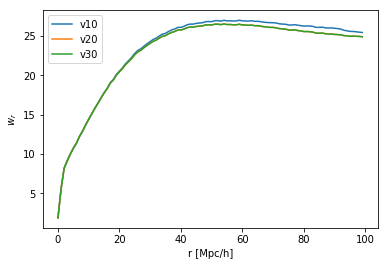

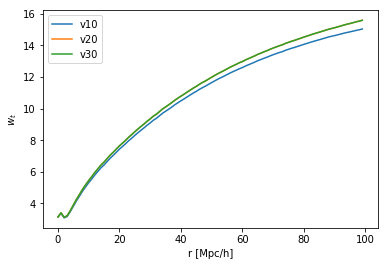

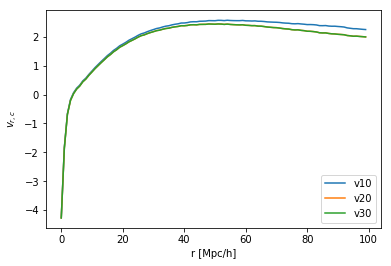

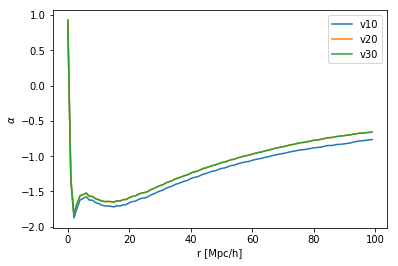

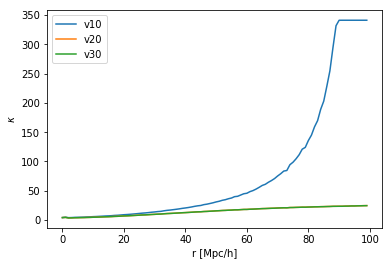

In [22]:
parameter_list = ['$w_r$', '$w_t$', '$v_{r,c}$', r'$\alpha$', '$\kappa$']

for i, parameter in enumerate(parameter_list):
    plt.plot(popt[0,:,i], label = 'v10')
    plt.plot(popt[1,:,i], label='v20')
    plt.plot(popt[2,:,i], label='v30')

    plt.xlabel('r [Mpc/h]')
    plt.ylabel(parameter_list[i])
    plt.legend()
    plt.show()

In [30]:
boxsize = '2000_vres2'
measured_vres2 = VD(box, boxsize, snapshot)

In [31]:
boxsize = '2000_vres3'
measured_vres3 = VD(box, boxsize, snapshot)

In [32]:
measured = [measured_v20, measured_vres2, measured_vres3]

In [33]:
popt = []
for i in range(len(measured)):
    
    params, pcov = sf.radial_tangential_skewtfit(measured[i].r,
        measured[i].v.r, measured[i].v.t, measured[i].jointpdf, log=False)
    
    popt.append(params)
popt = np.asarray(popt)

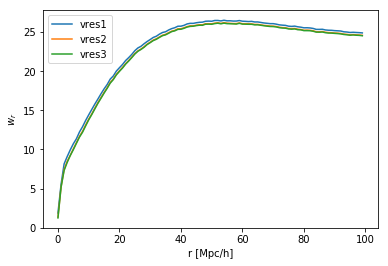

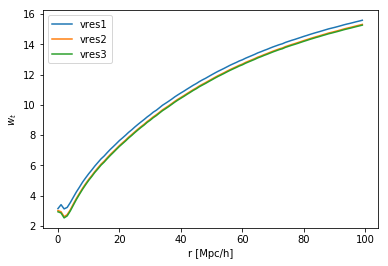

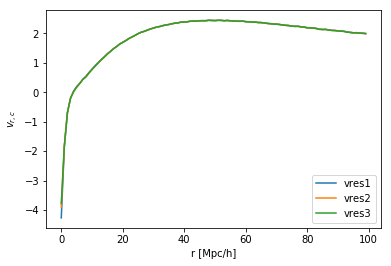

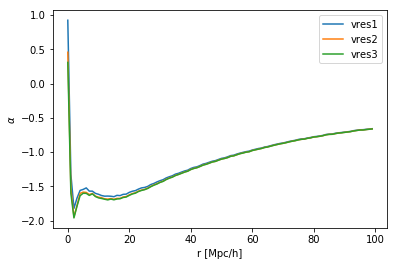

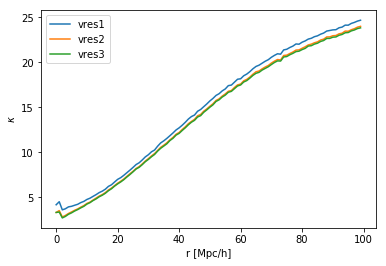

In [35]:
parameter_list = ['$w_r$', '$w_t$', '$v_{r,c}$', r'$\alpha$', '$\kappa$']

for i, parameter in enumerate(parameter_list):
    plt.plot(popt[0,:,i], label = 'vres1')
    plt.plot(popt[1,:,i], label='vres2')
    plt.plot(popt[2,:,i], label='vres3')

    plt.xlabel('r [Mpc/h]')
    plt.ylabel(parameter_list[i])
    plt.legend()
    plt.show()

In [5]:
measured = VD(box, boxsize, snapshot)

In [19]:
v_r = measured.v.r
v_t = measured.v.t

r = np.arange(0.5, 100, 1.)

v = np.array(np.meshgrid(v_r, v_t)).T.reshape(-1,2)

skewt = []
for rbin in range(len(r)):
    skewt.append(st.skewt(v, *popt[rbin]).reshape(v_t.shape[0], v_r.shape[0]))

skewt = np.asarray(skewt)


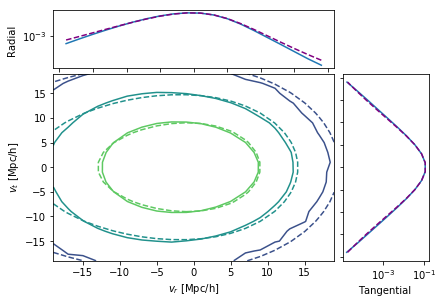

In [18]:
bestfit_jointplot(v_r, v_t, measured.jointpdf[35], skewt[35], log=True, log_marginals=True)